In [ ]:
## Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
import seaborn as sns

In [163]:
# import database
df = pd.read_csv('IBM Attrition Data.csv')

In [5]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
df.isnull().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

In [124]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


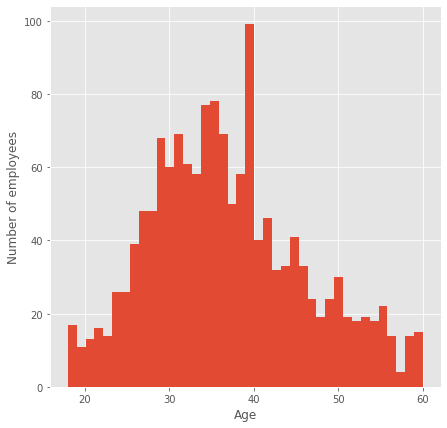

In [113]:
# age distribution of employees - histogram
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.hist(df['Age'], bins=40)
plt.xlabel('Age')
plt.ylabel('Number of employees')
plt.show()

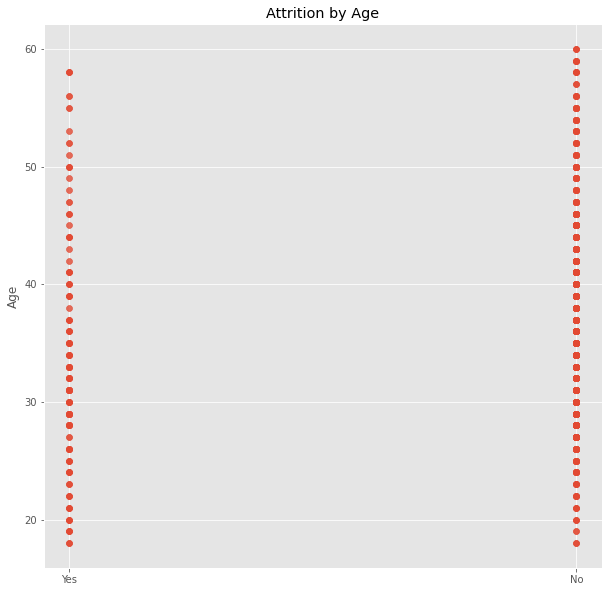

In [164]:
# explore data for Attrition by Age
plt.figure(figsize=(10,10))
plt.scatter(df["Attrition"],df["Age"], alpha=.55)
plt.title("Attrition by Age")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

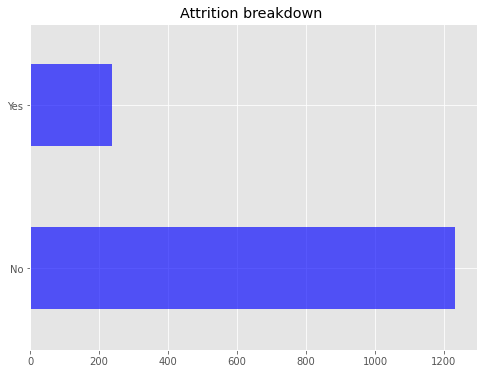

In [119]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
df["Attrition"].value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown")
plt.show()

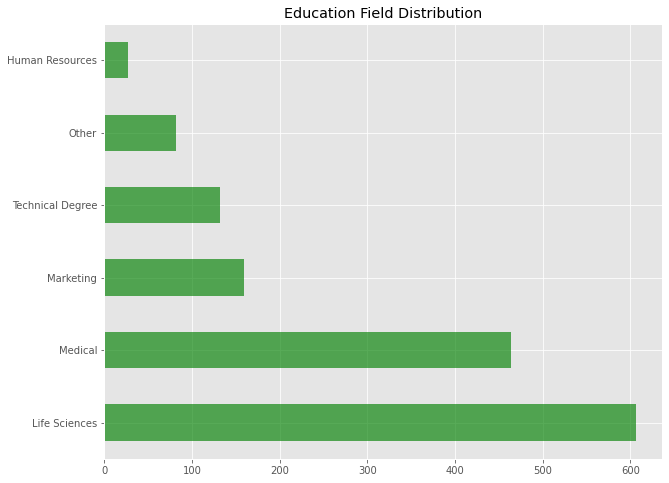

In [121]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
df["EducationField"].value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

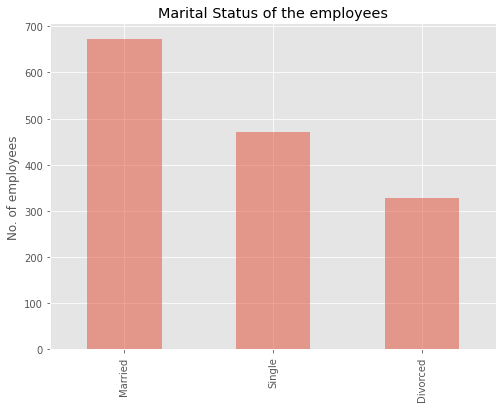

In [123]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
df["MaritalStatus"].value_counts().plot(kind='bar',alpha=.5)
plt.ylabel("No. of employees")
plt.title("Marital Status of the employees")
plt.show()

In [ ]:
# Logistic Regression

In [161]:
# import the necessary classes to perform Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices

In [125]:
# first we need to prepare the target and the dataset for the model
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [145]:
# we need to conver these categorical variables into numerical variables in order to perform the model
df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].replace('No', 0, inplace=True)
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [127]:
# we have categorical variables in 3 columns, we must encode them in order to perform classification correctly

# Convert categorical variable columns into a category
df["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [128]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [129]:
df["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [146]:
# Encoding 
cleanup_dict = {"Department":     {"Sales": 1, "Research & Development": 2, "Human Resources": 3},
                "EducationField": {"Life Sciences": 1, "Other": 2, "Medical": 3, "Marketing": 4,
                                  "Technical Degree": 5, "Human Resources": 6 },
                "MaritalStatus": {"Single": 1, "Married": 2, "Divorced": 3}}

In [147]:
# Replacing the Categorical variables by numerical variables
df = df.replace(cleanup_dict)
df.head()


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,1,2,1,2,4,1,5993,8,1,6
1,49,0,2,8,1,1,3,2,2,5130,1,3,10
2,37,1,2,2,2,2,4,3,1,2090,6,3,0
3,33,0,2,3,4,1,4,3,2,2909,1,3,8
4,27,0,2,2,1,3,1,2,2,3468,9,3,2


In [148]:
# building up a logistic regression model - define data (x) and target (y)
X = df.drop(['Attrition'],axis=1)
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,2,1,2,4,1,5993,8,1,6
1,49,2,8,1,1,3,2,2,5130,1,3,10
2,37,2,2,2,2,4,3,1,2090,6,3,0
3,33,2,3,4,1,4,3,2,2909,1,3,8
4,27,2,2,1,3,1,2,2,3468,9,3,2


In [149]:
Y = df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [150]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [162]:
y = np.ravel(y)
y.mean()

0.16122448979591836

In [156]:
# Split the training and testing data and fit the training data into the model 
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [157]:
# get prediction from the test data 
prediction=model2.predict(X_test)
print(prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [158]:
# get correct prediction probability
probs = model2.predict_proba(X_test)
print (probs)

[[0.87833362 0.12166638]
 [0.63959455 0.36040545]
 [0.79377288 0.20622712]
 [0.76327726 0.23672274]
 [0.95923167 0.04076833]
 [0.75020782 0.24979218]
 [0.94668938 0.05331062]
 [0.9352026  0.0647974 ]
 [0.81742284 0.18257716]
 [0.71945078 0.28054922]
 [0.9616969  0.0383031 ]
 [0.84557928 0.15442072]
 [0.82001617 0.17998383]
 [0.91713081 0.08286919]
 [0.82666698 0.17333302]
 [0.93377698 0.06622302]
 [0.9069917  0.0930083 ]
 [0.86030408 0.13969592]
 [0.69521298 0.30478702]
 [0.81338609 0.18661391]
 [0.90761427 0.09238573]
 [0.86235621 0.13764379]
 [0.92782847 0.07217153]
 [0.84228915 0.15771085]
 [0.70389086 0.29610914]
 [0.97043796 0.02956204]
 [0.71758596 0.28241404]
 [0.77248779 0.22751221]
 [0.90018841 0.09981159]
 [0.86053916 0.13946084]
 [0.82097241 0.17902759]
 [0.89245457 0.10754543]
 [0.85967726 0.14032274]
 [0.86604347 0.13395653]
 [0.74617909 0.25382091]
 [0.95238686 0.04761314]
 [0.88630585 0.11369415]
 [0.87314302 0.12685698]
 [0.8427001  0.1572999 ]
 [0.8169568  0.1830432 ]


In [159]:
# get accuracy score and AUC score
print (metrics.accuracy_score(y_test, prediction))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8027210884353742
0.6671537112799533


In [160]:
# get confusion matrix and classification report
print (metrics.confusion_matrix(y_test, prediction))
print (metrics.classification_report(y_test, prediction))

[[236   0]
 [ 58   0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       236
         1.0       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
